# Raw code for Practice 1 (Lagrange interpolation)

This notebook is for practicing the method and testing the features of Python and Sympy that will help develop a better final version of the code.

In [1]:
import numpy as np
from sympy import init_session
init_session(use_latex=True)
%matplotlib inline

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
# Experimental data to be interpolated
X = [0,2,3,10,12]
Y = [-1,1,2,3,4]
n = len(X)
n

C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
Th

In [3]:
L = zeros(n,1)
L

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [4]:
X = Array(X)
Y = Array(Y)
Y

[-1  1  2  3  4]

In [38]:
# Lagrange multipliers
L[0] = (x-X[1])*(x-X[2])*(x-X[3])*(x-X[4]) \
/ ((X[0]-X[1])*(X[0]-X[2])*(X[0]-X[3])*(X[0]-X[4]))
L[1] = (x-X[0])*(x-X[2])*(x-X[3])*(x-X[4]) \
/ ((X[1]-X[0])*(X[1]-X[2])*(X[1]-X[3])*(X[1]-X[4]))
L[2] = (x-X[0])*(x-X[1])*(x-X[3])*(x-X[4]) \
/ ((X[2]-X[0])*(X[2]-X[1])*(X[2]-X[3])*(X[2]-X[4]))
L[3] = (x-X[0])*(x-X[1])*(x-X[2])*(x-X[4]) \
/ ((X[3]-X[0])*(X[3]-X[1])*(X[3]-X[2])*(X[3]-X[4]))
L[4] = (x-X[0])*(x-X[1])*(x-X[2])*(x-X[3]) \
/ ((X[4]-X[0])*(X[4]-X[1])*(X[4]-X[2])*(X[4]-X[3]))

L

⎡(x - 12)⋅(x - 10)⋅(x - 3)⋅(x - 2)⎤
⎢─────────────────────────────────⎥
⎢               720               ⎥
⎢                                 ⎥
⎢  -x⋅(x - 12)⋅(x - 10)⋅(x - 3)   ⎥
⎢  ─────────────────────────────  ⎥
⎢               160               ⎥
⎢                                 ⎥
⎢   x⋅(x - 12)⋅(x - 10)⋅(x - 2)   ⎥
⎢   ───────────────────────────   ⎥
⎢               189               ⎥
⎢                                 ⎥
⎢  -x⋅(x - 12)⋅(x - 3)⋅(x - 2)    ⎥
⎢  ────────────────────────────   ⎥
⎢              1120               ⎥
⎢                                 ⎥
⎢   x⋅(x - 10)⋅(x - 3)⋅(x - 2)    ⎥
⎢   ──────────────────────────    ⎥
⎣              2160               ⎦

In [20]:
# Lagrange multipliers with for loop and list comprehensions
L = zeros(n,1)
for i in range(n):
    num = [x-X[j] for j in range(n) if j!=i]
    den = [X[i]-X[j] for j in range(n) if j!=i]
    N, D = 1, 1
    for k in range(len(num)):
        N *= num[k]
        D *= den[k]
    L[i] = N/D
L

⎡(x - 12)⋅(x - 10)⋅(x - 3)⋅(x - 2)⎤
⎢─────────────────────────────────⎥
⎢               720               ⎥
⎢                                 ⎥
⎢  -x⋅(x - 12)⋅(x - 10)⋅(x - 3)   ⎥
⎢  ─────────────────────────────  ⎥
⎢               160               ⎥
⎢                                 ⎥
⎢   x⋅(x - 12)⋅(x - 10)⋅(x - 2)   ⎥
⎢   ───────────────────────────   ⎥
⎢               189               ⎥
⎢                                 ⎥
⎢  -x⋅(x - 12)⋅(x - 3)⋅(x - 2)    ⎥
⎢  ────────────────────────────   ⎥
⎢              1120               ⎥
⎢                                 ⎥
⎢   x⋅(x - 10)⋅(x - 3)⋅(x - 2)    ⎥
⎢   ──────────────────────────    ⎥
⎣              2160               ⎦

In [21]:
# A better version
L = zeros(n,1)
for i in range(n):
    num = [(x-X[j]) for j in range(n) if j!=i]
    den = [(X[i]-X[j]) for j in range(n) if j!=i]
    N, D = 1, 1 
    for nn in num: N*=nn
    for dd in den: D*=dd
    L[i] = N/D
L

⎡(x - 12)⋅(x - 10)⋅(x - 3)⋅(x - 2)⎤
⎢─────────────────────────────────⎥
⎢               720               ⎥
⎢                                 ⎥
⎢  -x⋅(x - 12)⋅(x - 10)⋅(x - 3)   ⎥
⎢  ─────────────────────────────  ⎥
⎢               160               ⎥
⎢                                 ⎥
⎢   x⋅(x - 12)⋅(x - 10)⋅(x - 2)   ⎥
⎢   ───────────────────────────   ⎥
⎢               189               ⎥
⎢                                 ⎥
⎢  -x⋅(x - 12)⋅(x - 3)⋅(x - 2)    ⎥
⎢  ────────────────────────────   ⎥
⎢              1120               ⎥
⎢                                 ⎥
⎢   x⋅(x - 10)⋅(x - 3)⋅(x - 2)    ⎥
⎢   ──────────────────────────    ⎥
⎣              2160               ⎦

In [23]:
# Interpolating polynomial
Pol = 0
for i in range(n):
    Pol += Y[i] * L[i]

Pol

In [24]:
simplify(Pol)

In [33]:
xx = 5/6
sympify(xx)
print(type(xx))
xx

<class 'float'>


In [28]:
# Interpolation
xx = 1

interp = Pol.subs(x,xx)
interp

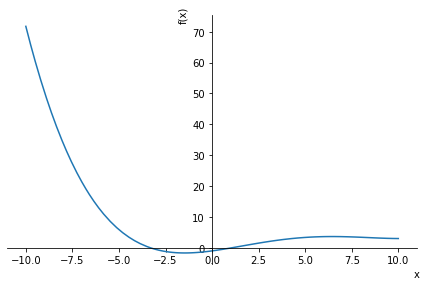

In [37]:
# Graphics
p1 = plot(Pol, show=True)